# Tes `SORA` dengan data SAO 159052

In [1]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [2]:
df = pd.read_csv('sao-159052.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
996,5496.0,[17:09:55.8028713],10175.0,2670608.0,8392.53,795.22,-317,11376,492.0,331.0
997,5497.0,[17:09:55.8129709],-5193.0,2645392.0,8361.47,793.05,-317,11056,492.0,331.0
998,5498.0,[17:09:55.8230704],23336.0,2681136.0,8384.23,791.46,-317,11216,492.0,331.0
999,5499.0,[17:09:55.8331700],1261.0,2656784.0,8377.04,816.93,-317,11856,492.0,331.0
1000,5500.0,[17:09:55.8432696],-11273.0,2637744.0,8356.52,793.81,-317,11504,492.0,331.0


In [3]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])
# df['timeInfo'] = pd.to_timedelta(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
996,5496.0,2022-07-29 17:09:55.802871,10175.0,2670608.0,8392.53,795.22,-317,11376,492.0,331.0
997,5497.0,2022-07-29 17:09:55.812970,-5193.0,2645392.0,8361.47,793.05,-317,11056,492.0,331.0
998,5498.0,2022-07-29 17:09:55.823070,23336.0,2681136.0,8384.23,791.46,-317,11216,492.0,331.0
999,5499.0,2022-07-29 17:09:55.833170,1261.0,2656784.0,8377.04,816.93,-317,11856,492.0,331.0
1000,5500.0,2022-07-29 17:09:55.843269,-11273.0,2637744.0,8356.52,793.81,-317,11504,492.0,331.0


In [4]:
data = df[['FrameNum','timeInfo','signal-stack']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
996,5496.0,2022-07-29 17:09:55.802871,10175.0
997,5497.0,2022-07-29 17:09:55.812970,-5193.0
998,5498.0,2022-07-29 17:09:55.823070,23336.0
999,5499.0,2022-07-29 17:09:55.833170,1261.0
1000,5500.0,2022-07-29 17:09:55.843269,-11273.0


In [5]:
data_cp = data.copy()

data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,JD,frac_JD
0,4500.0,2022-07-29 17:09:45.743682,46845.0,2459790.215112774,0.21511277416720986
1,4501.0,2022-07-29 17:09:45.753781,25380.0,2459790.215112891,0.21511289104819298
2,4502.0,2022-07-29 17:09:45.763881,36268.0,2459790.215113008,0.2151130079291761
3,4503.0,2022-07-29 17:09:45.773980,49749.0,2459790.215113125,0.2151131248101592
4,4504.0,2022-07-29 17:09:45.784080,53264.0,2459790.2151132417,0.21511324169114232
...,...,...,...,...,...
996,5496.0,2022-07-29 17:09:55.802871,10175.0,2459790.2152291997,0.21522919973358512
997,5497.0,2022-07-29 17:09:55.812970,-5193.0,2459790.2152293166,0.21522931661456823
998,5498.0,2022-07-29 17:09:55.823070,23336.0,2459790.2152294335,0.21522943349555135
999,5499.0,2022-07-29 17:09:55.833170,1261.0,2459790.2152295504,0.21522955037653446


Text(0.5, 0, 'Frames')

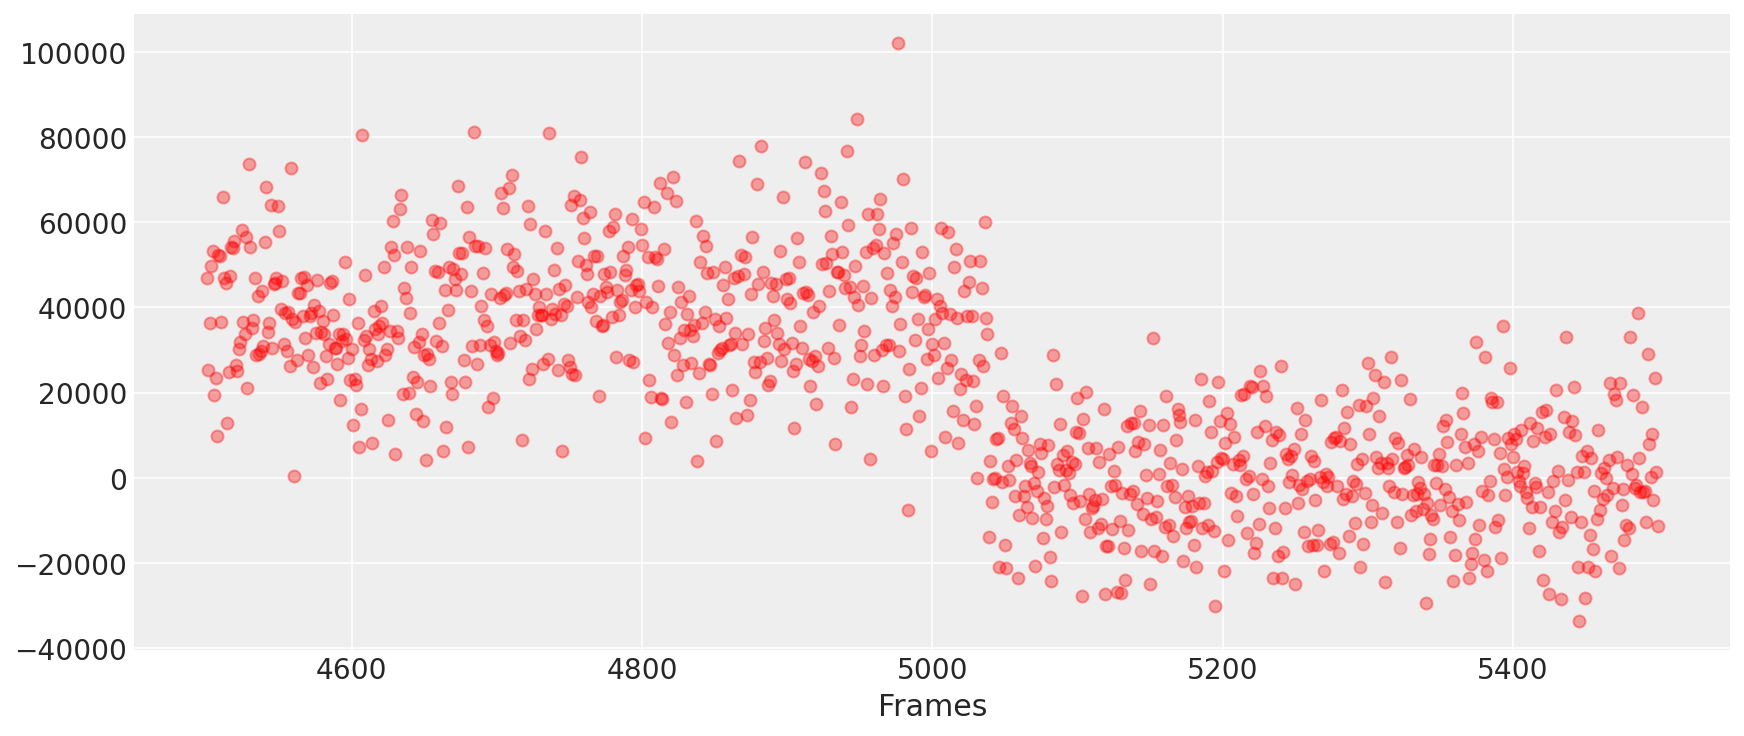

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data_cp['Frame'], data_cp['Value'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## Normalisasi data

In [7]:
data_cp['value_scaled'] = data_cp['Value']/(data_cp['Value'].std()*2)
# value_scaled = (data['Value'] - data['Value'].mean()) / data['Value'].std()

Text(0.5, 0, 'Julian Date')

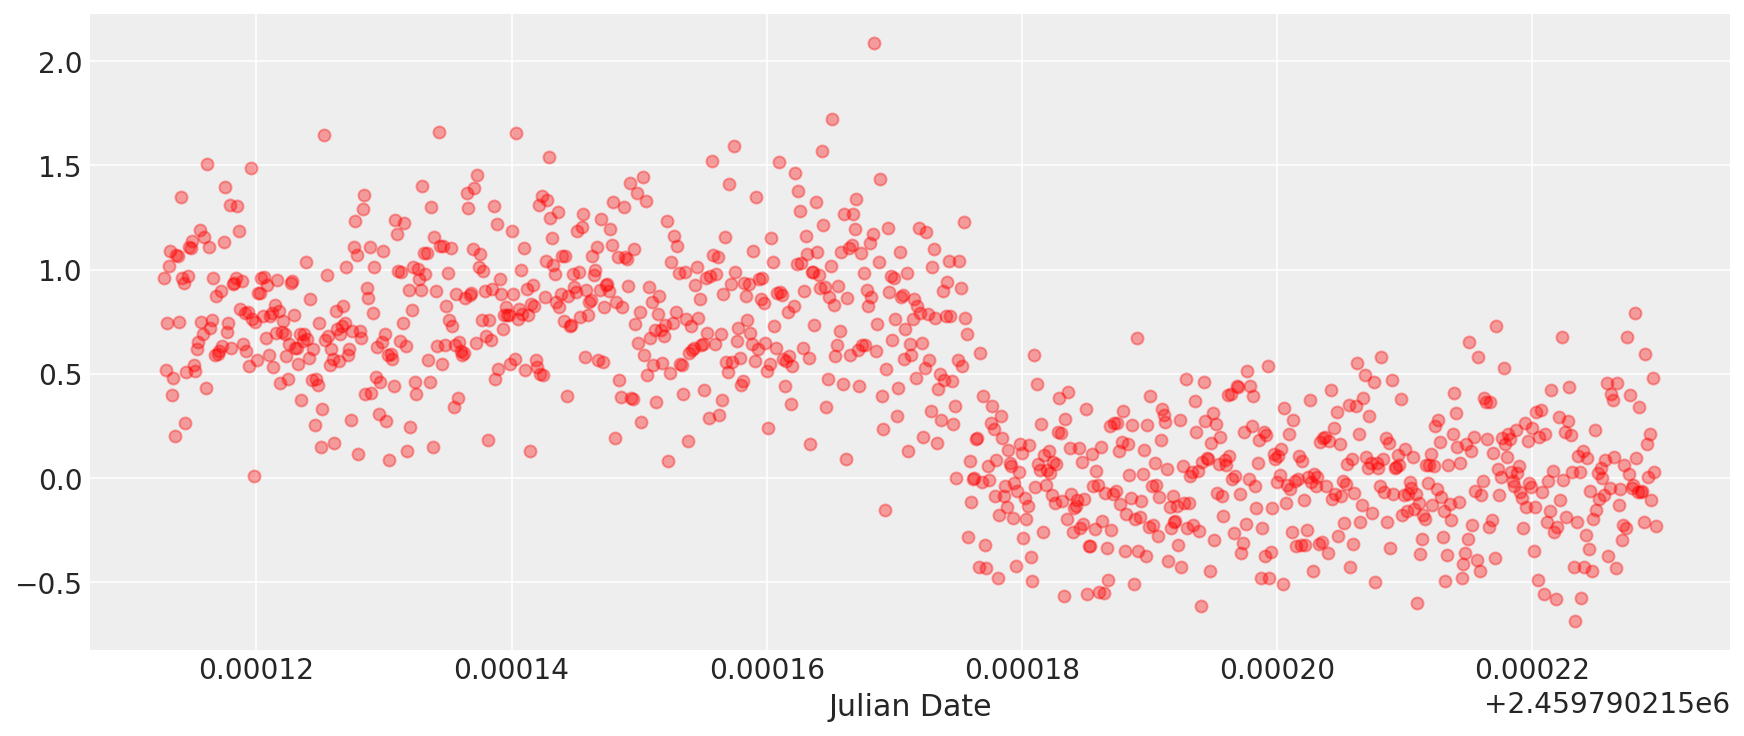

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
# fig, ax = plt.subplots()
# ax.plot(data['frac_JD'], value_scaled, 'ro', alpha=0.35)
ax.plot(data_cp['JD'], data_cp['value_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Julian Date')

## Tulis hasil normalisasi ke file `csv`

In [9]:
data_cp.to_csv('lc_sao159052.csv', header=False, columns=['JD', 'value_scaled'], index=False, sep='\t')

## Siapkan kurva cahaya observasi untuk `SORA`

In [10]:
lc = LightCurve(name='SAO 159052', file='lc_sao159052.csv', exptime=0.01)

print(lc)

Light curve name: SAO 159052
Initial time: 2022-07-29 17:09:45.744 UTC
End time:     2022-07-29 17:09:55.843 UTC
Duration:     0.168 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 1001


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




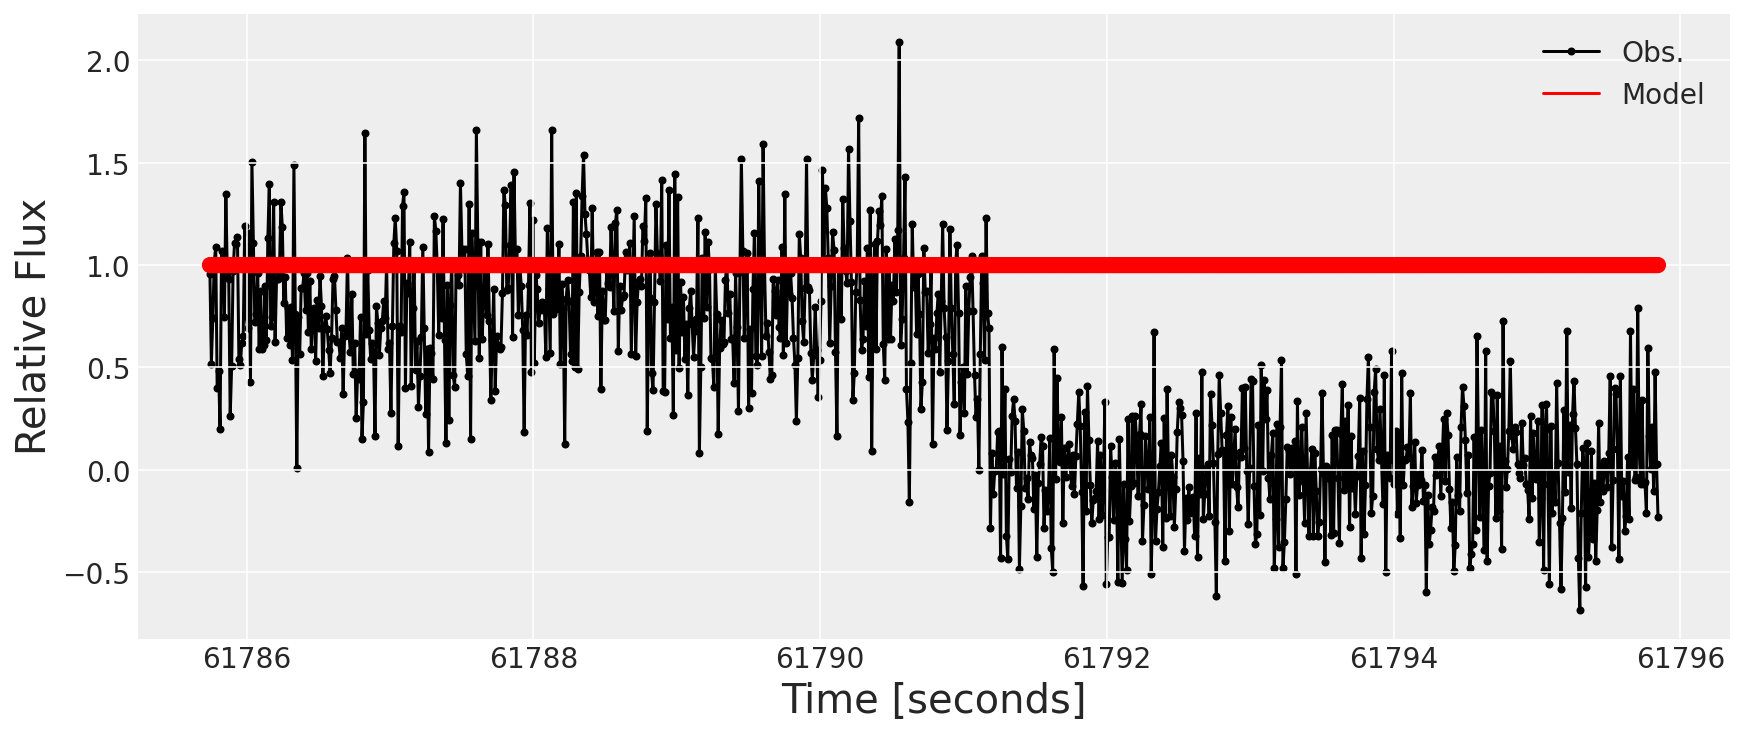

In [11]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

In [12]:
lc.reset_flux()

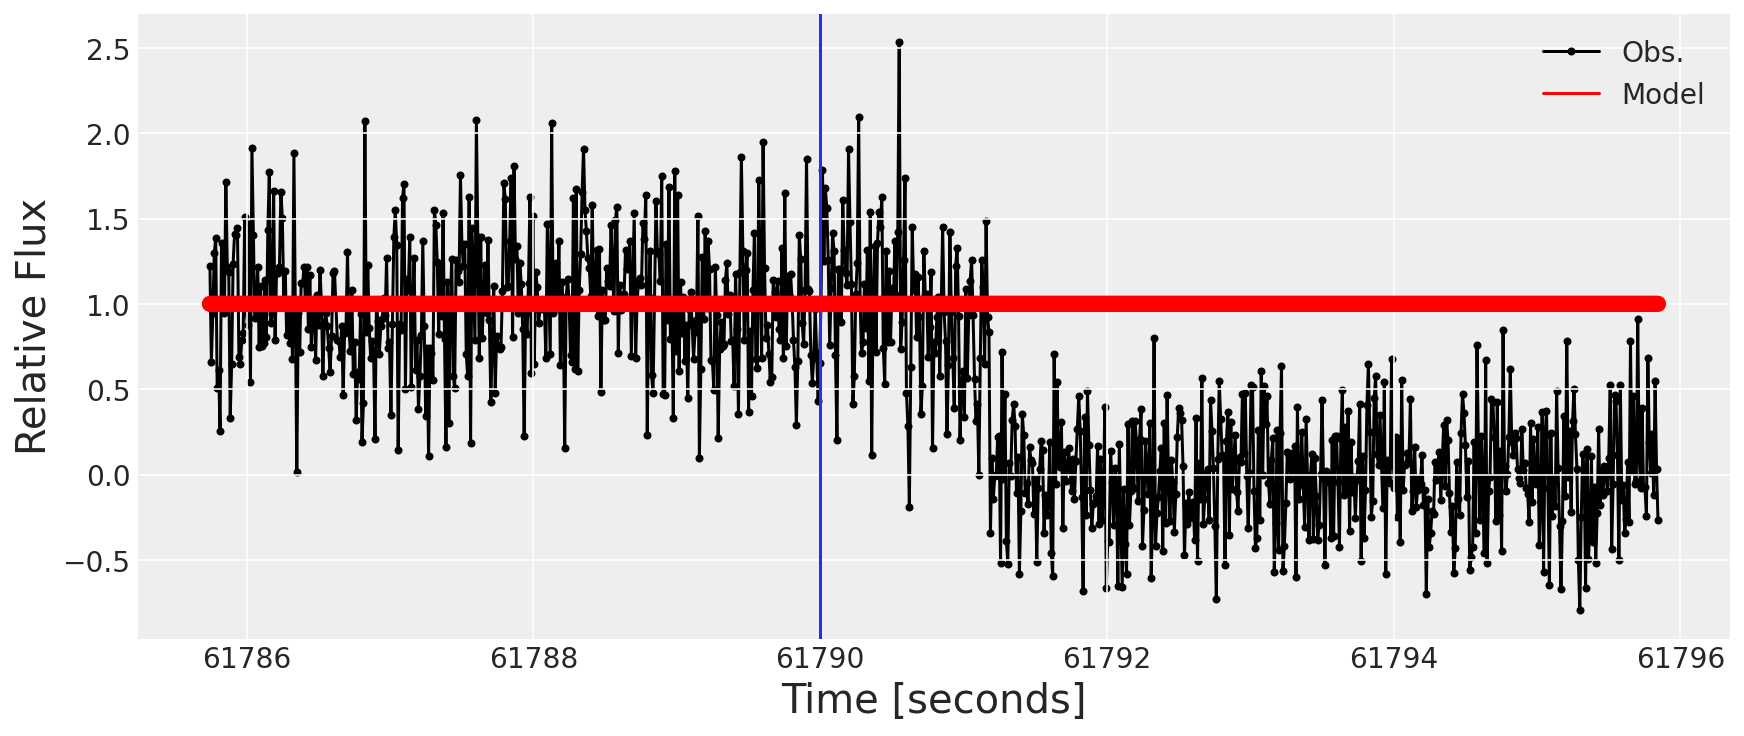

In [13]:
plt.figure(figsize=(12,5))
mask = lc.time < 61790

lc.normalize(poly_deg=1, mask=mask)

lc.plot_lc()
plt.axvline(61790)

{'rank': 1,
 'occultation_duration': 4.660465568304062,
 'central_time': 61783.413923978806,
 'immersion_time': 61781.08369119465,
 'emersion_time': 61785.74415676296,
 'time_err': 0.005049258470535278,
 'depth': 0.9945705782142209,
 'depth_err': 0.32128393272565836,
 'baseline': 0.9952406826343909,
 'baseline_err': 0.39651781143037035,
 'snr': 3.095612562310971,
 'occ_mask': array([ True, False, False, ...,  True,  True,  True])}

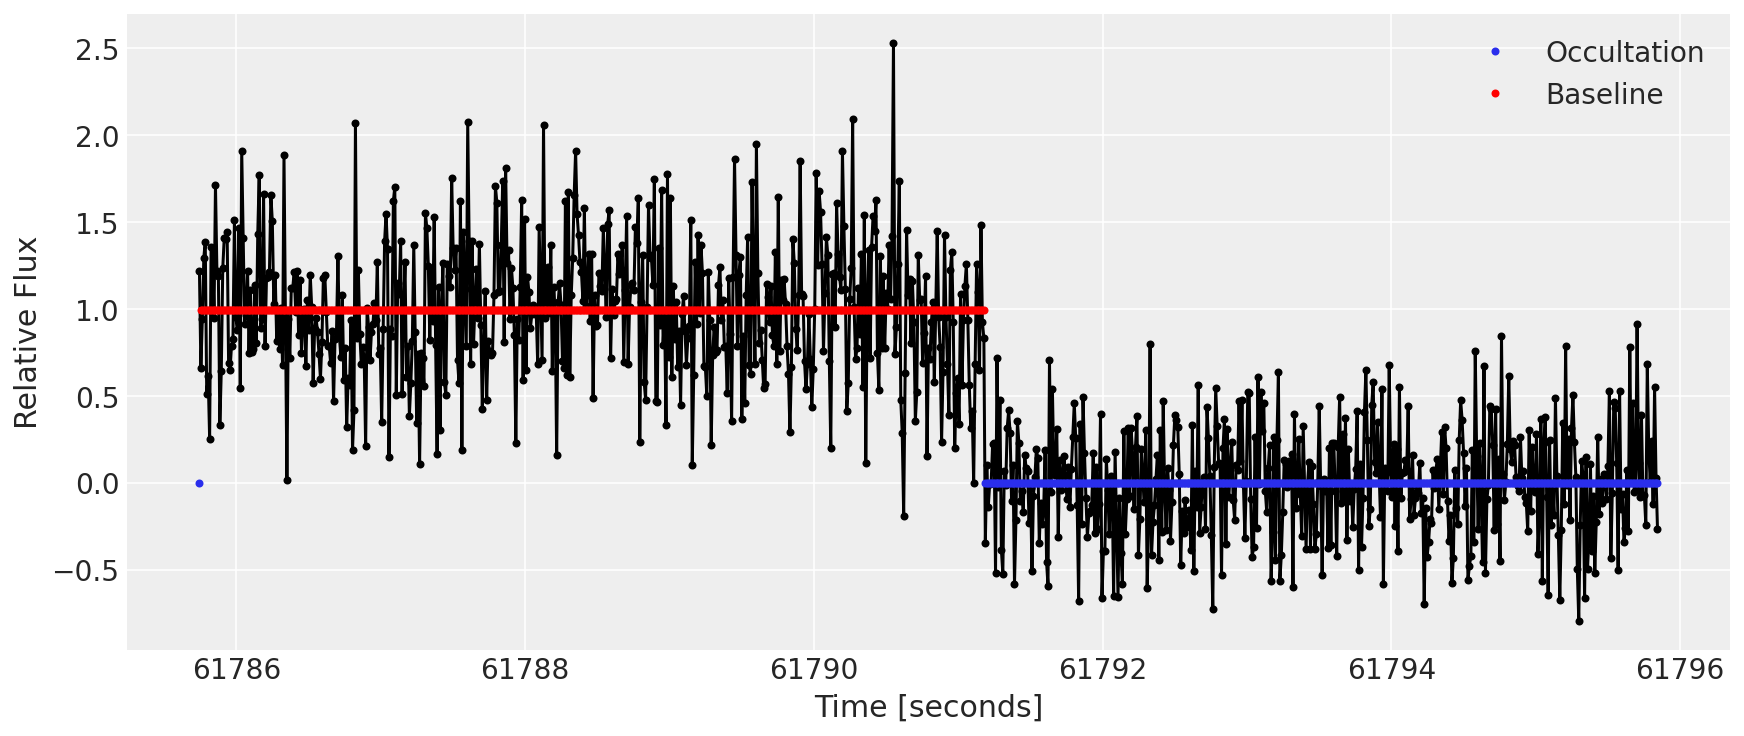

In [14]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **9 Juli 2022 pukul 17:09:51.3 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [15]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 7, 9, 17, 9, 51.3)

In [16]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [17]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [18]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

15h 12m 08.67s
-17deg 50' 57.0"
0.0024641347651207083


In [19]:
d_moon = distance.au
d_moon

0.0024641347651207083

In [20]:
lc.set_dist(dist=d_moon)

lc.dist

0.0024641347651207083

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [21]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [22]:
lc.fresnel_scale

0.01002637654723772

In [23]:
from sora import Star
from sora.star import kervella, van_belle

In [24]:
star = Star(coord='15 09 20.1804399936 -18 00 54.193837644')

c:\Users\User\.conda\envs\work2\lib\site-packages\sora\star\core.py:338: UserWarning: This star was indicated as an source with duplicate sources Please be aware that its positions must be handled with care.
  warnings.warn('This star was indicated as an source with duplicate sources '+


1 Gaia-EDR3 star found G=8.238256
star coordinate at J2016.0: RA=15h09m20.25577s +/- 0.0236 mas, DEC=-18d00m55.4990s +/- 0.0186 mas



In [25]:
star.mag

{'G': 8.238256,
 'B': 8.881999969482422,
 'V': 8.380999565124512,
 'R': 8.039999961853027,
 'J': 7.265999794006348,
 'H': 7.0370001792907715,
 'K': 6.915999889373779}

In [26]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-07-09 17:09:51.3', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

15h09m20.2856767948s -18d00m56.0277517896s


In [27]:
star.error_at(time='2022-07-09 17:09:51.3')

(<Quantity 0.20779542 mas>, <Quantity 0.15912458 mas>)

In [28]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00031374 km>

In [29]:
diameter.value

0.00031374169065897844

In [30]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s.

In [31]:
distance.km

368629.31397990254

In [32]:
from astropy.coordinates import Angle
ang_vel = 0.55*u.arcsec # dalam arcsec/s

lin_vel = distance.km * np.tan(ang_vel)

lin_vel

<Quantity 0.98294094>

In [33]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 4.660465568304062,
 'central_time': 61783.413923978806,
 'immersion_time': 61781.08369119465,
 'emersion_time': 61785.74415676296,
 'time_err': 0.005049258470535278,
 'depth': 0.9945705782142209,
 'depth_err': 0.32128393272565836,
 'baseline': 0.9952406826343909,
 'baseline_err': 0.39651781143037035,
 'snr': 3.095612562310971,
 'occ_mask': array([ True, False, False, ...,  True,  True,  True])}

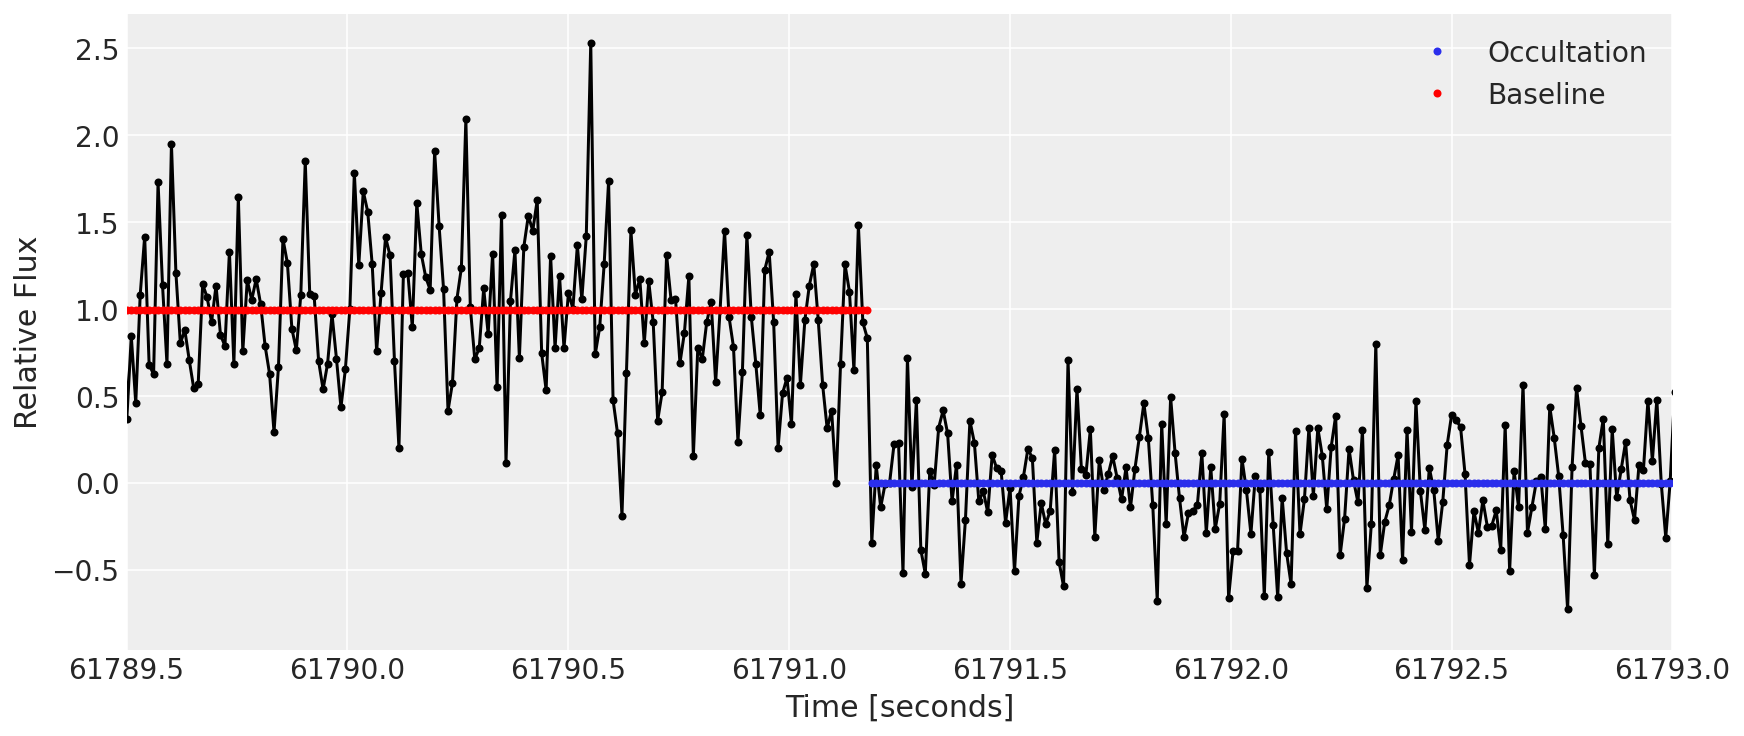

In [34]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)
plt.xlim(61789.5, 61793)
tes2

**Parameter untuk model**

In [35]:
immersion_time = 61791.181  # seconds relative to tref
emersion_time  = 61797.000  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 4 # seconds relative to tref
tmax = emersion_time   + 1 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

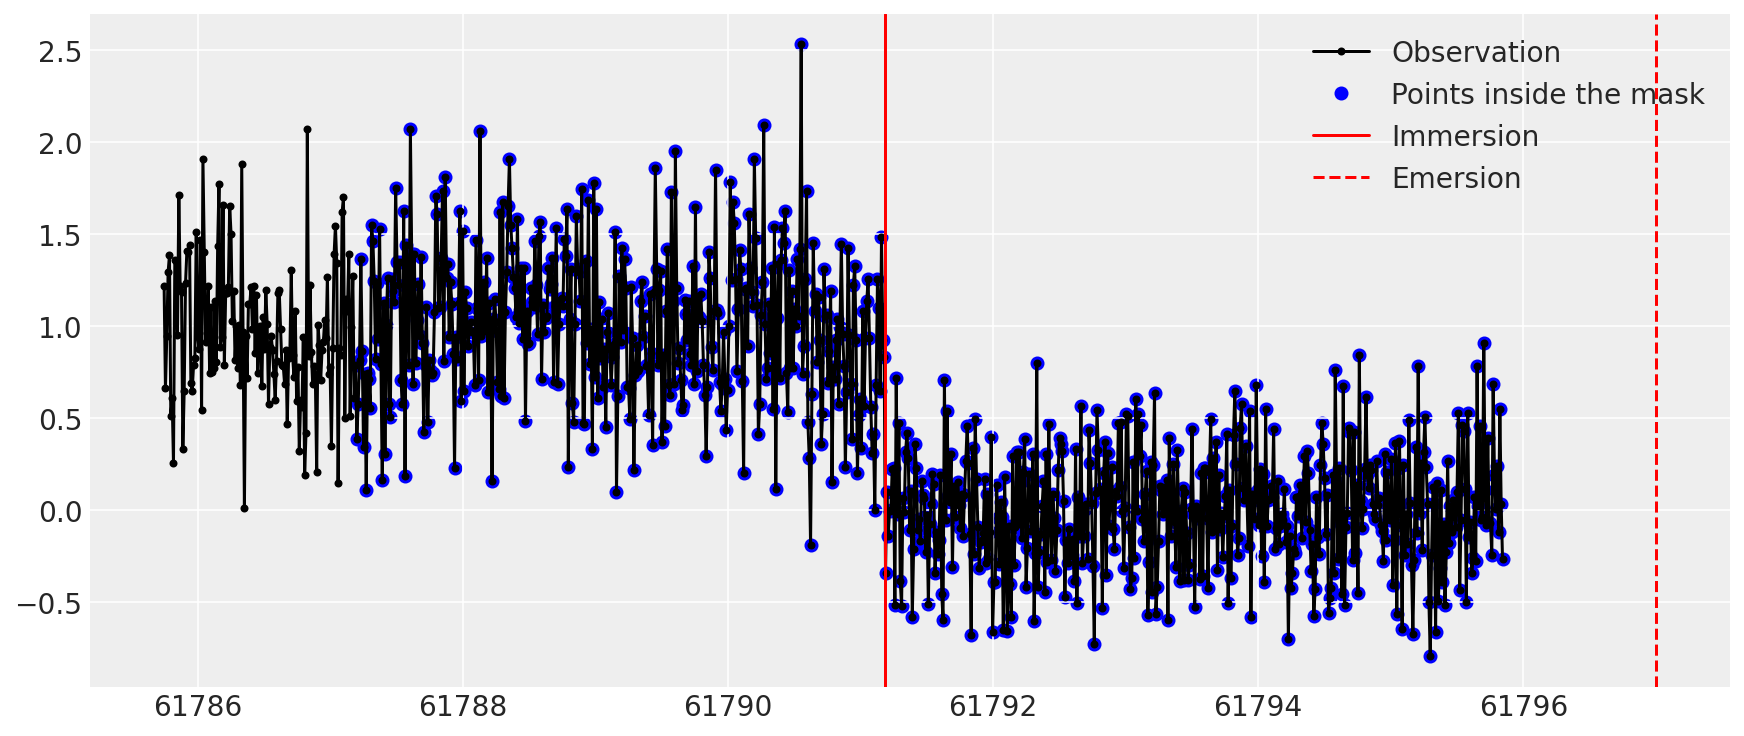

In [36]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()
# plt.show()

(61789.0, 61793.0)

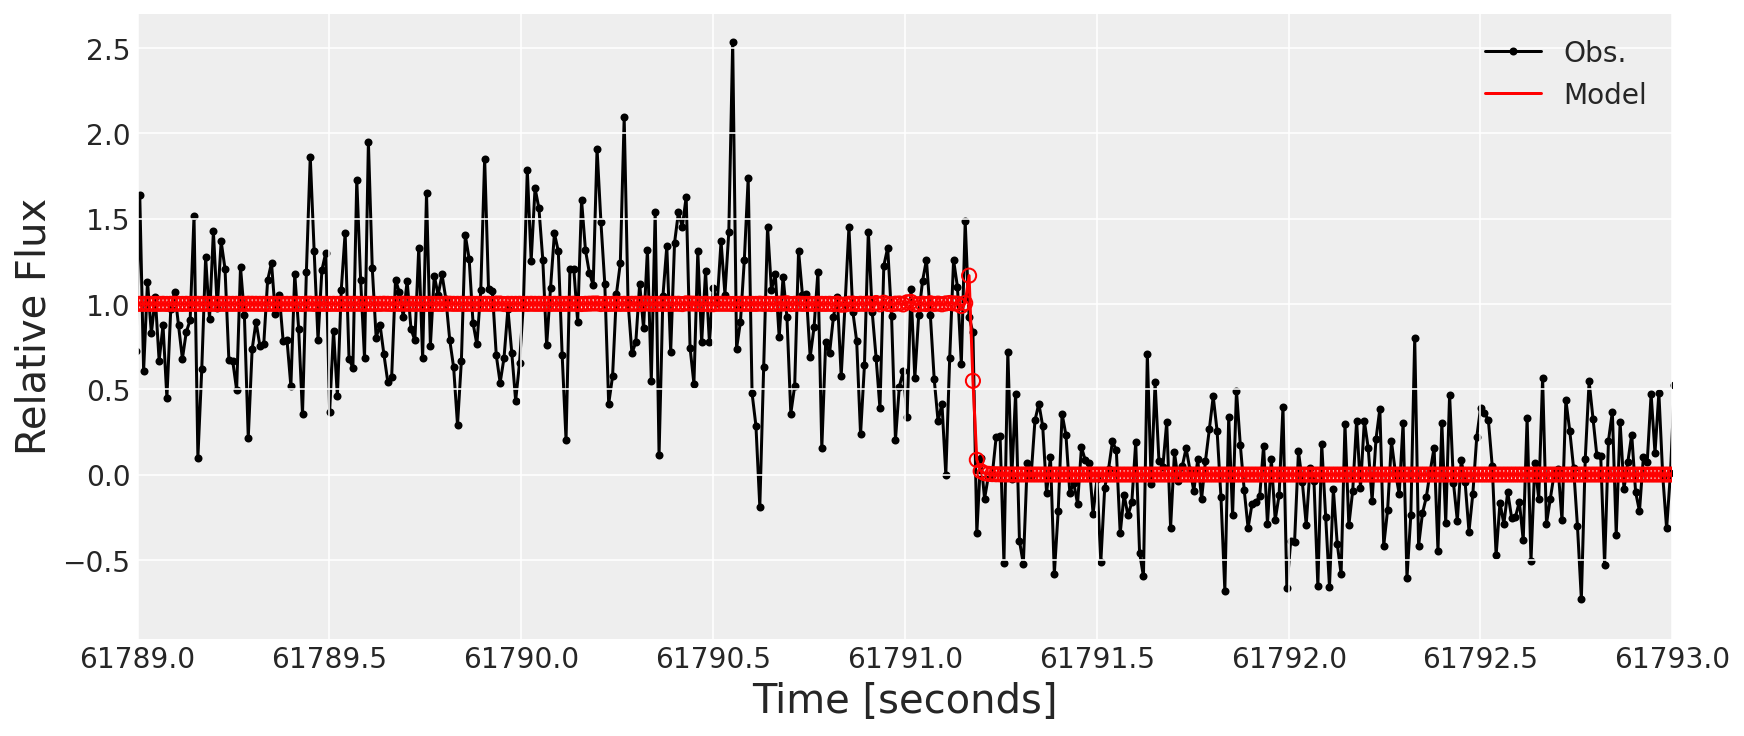

In [37]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
plt.xlim(61789,61793)


Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

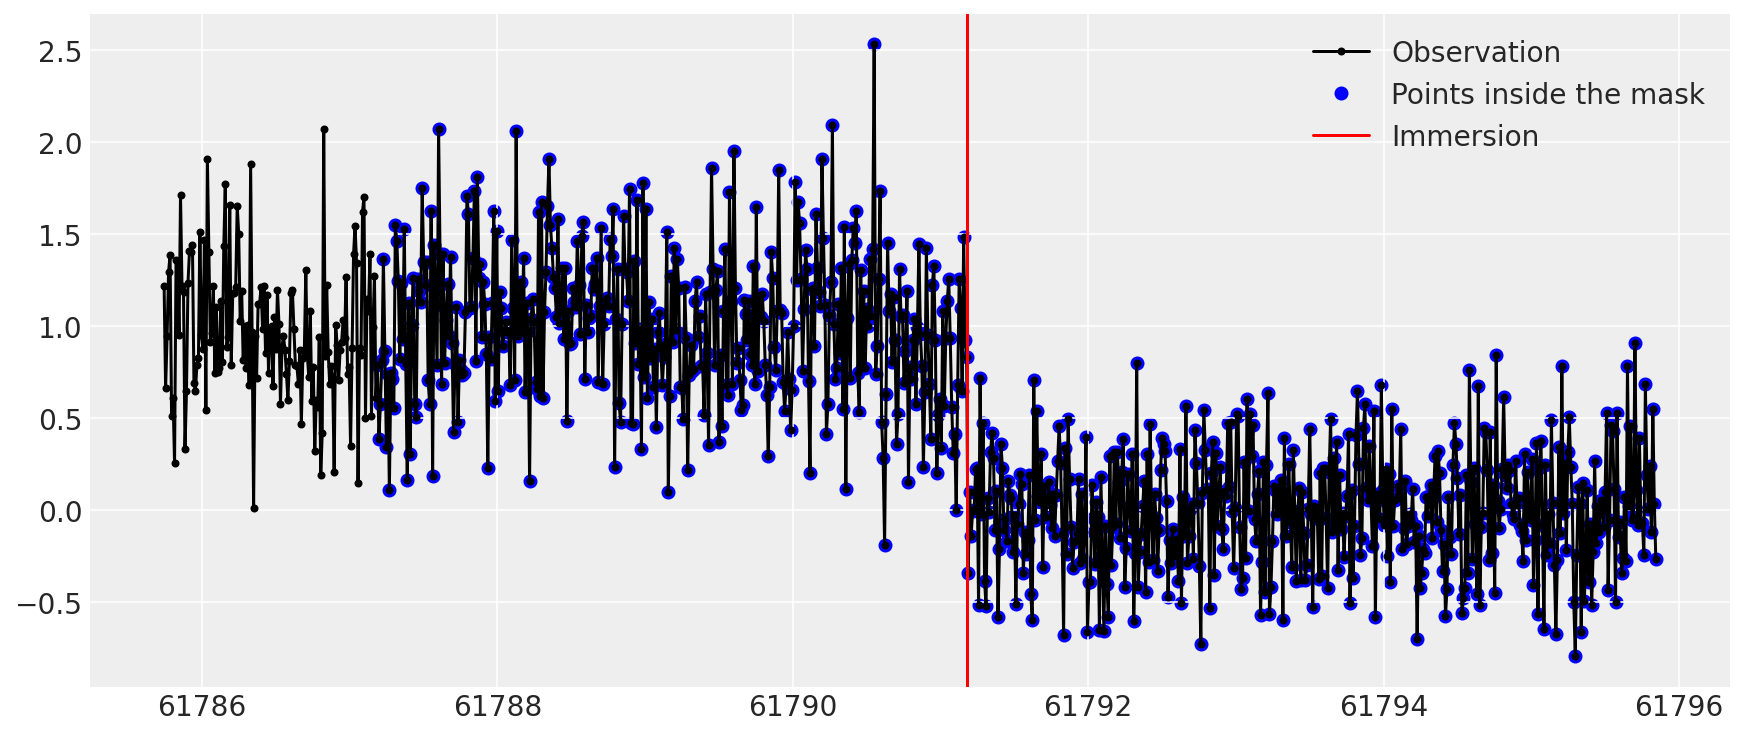

In [38]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [39]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000, delta_t=0.1)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [40]:
print(lc_chi2_imm)

Minimum chi-square: 675.234
Number of fitted points: 858
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.788

immersion:
    1-sigma: 61791.183 +/- 0.003
    3-sigma: 61791.179 +/- 0.016



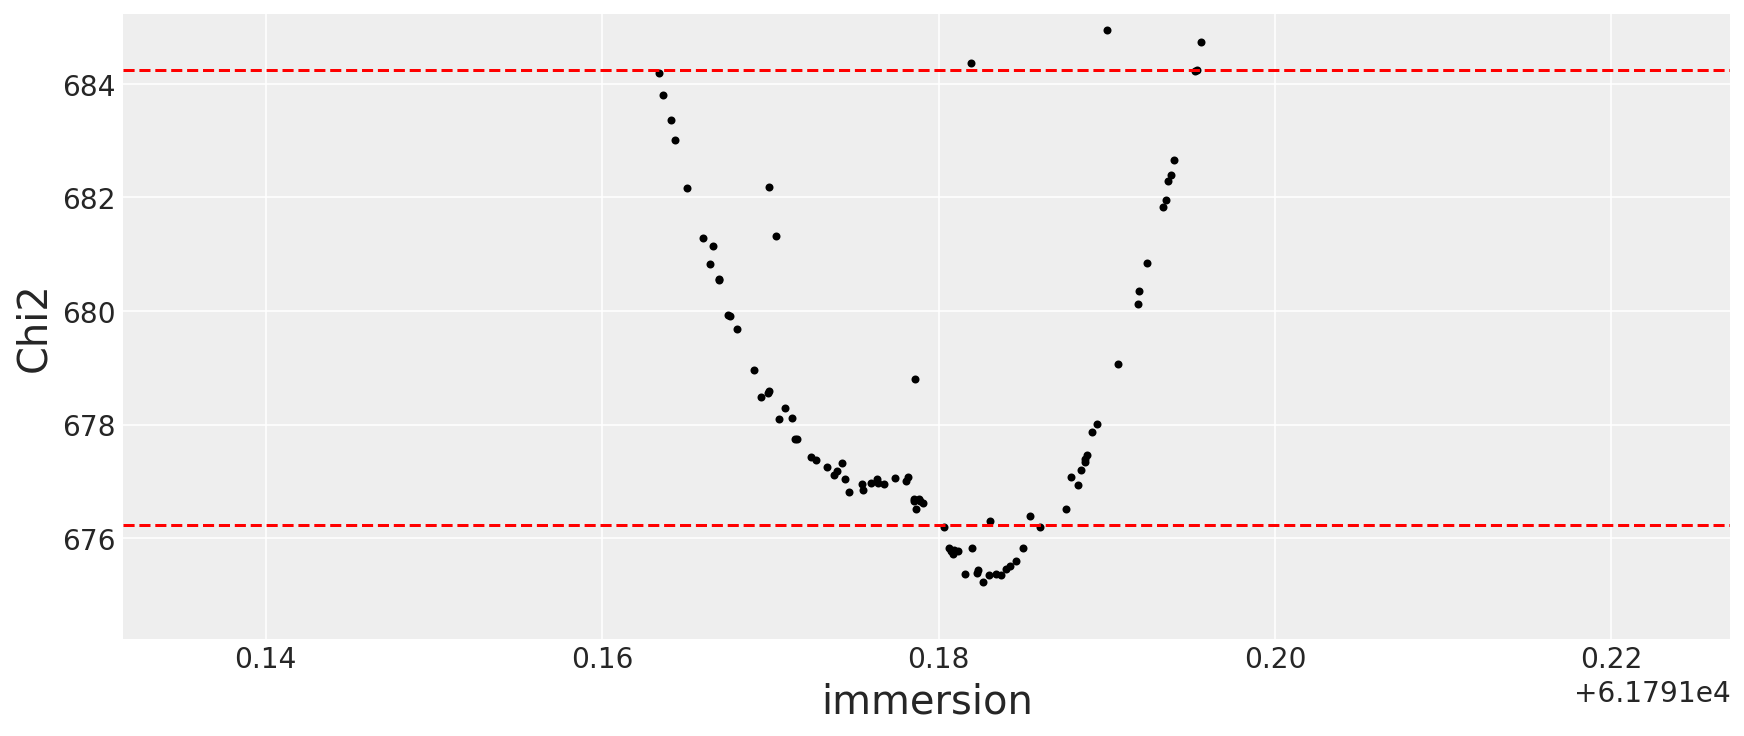

In [41]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [42]:
print(lc)

Light curve name: SAO 159052
Initial time: 2022-07-29 17:09:45.744 UTC
End time:     2022-07-29 17:09:55.843 UTC
Duration:     0.168 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 1001

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.983 km/s
Fresnel scale:        0.010 seconds or 0.01 km
Stellar size effect:  0.000 seconds or 0.00 km
Inst. response:       0.010 seconds or 0.01 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.001 seconds or 0.00 km
Modelled baseflux:    0.995
Modelled bottomflux:  0.005
Light curve sigma:    0.406

Immersion and emersion times were not fitted or instantiated.

Monte Carlo chi square fit.

Minimum chi-square: 675.234
Number of fitted points: 858
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.788

immersion:
    1-sigma: 61791.183 +/- 0.003
    3-sigma: 61791.179 +/- 0.016




(61790.5, 61792.0)

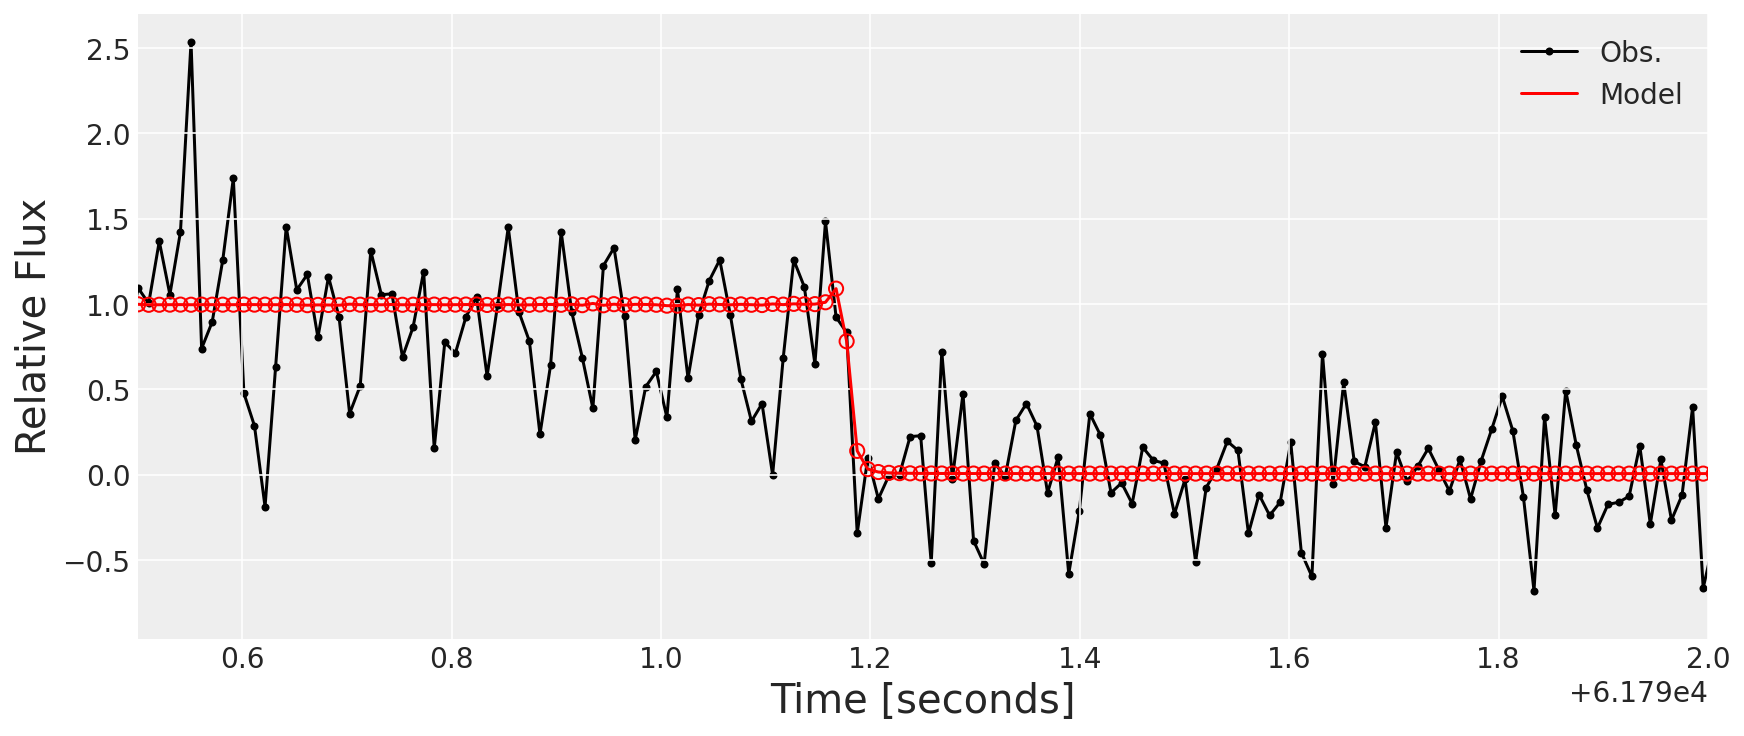

In [43]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(61790.5, 61792)

(-1.0, 1.5)

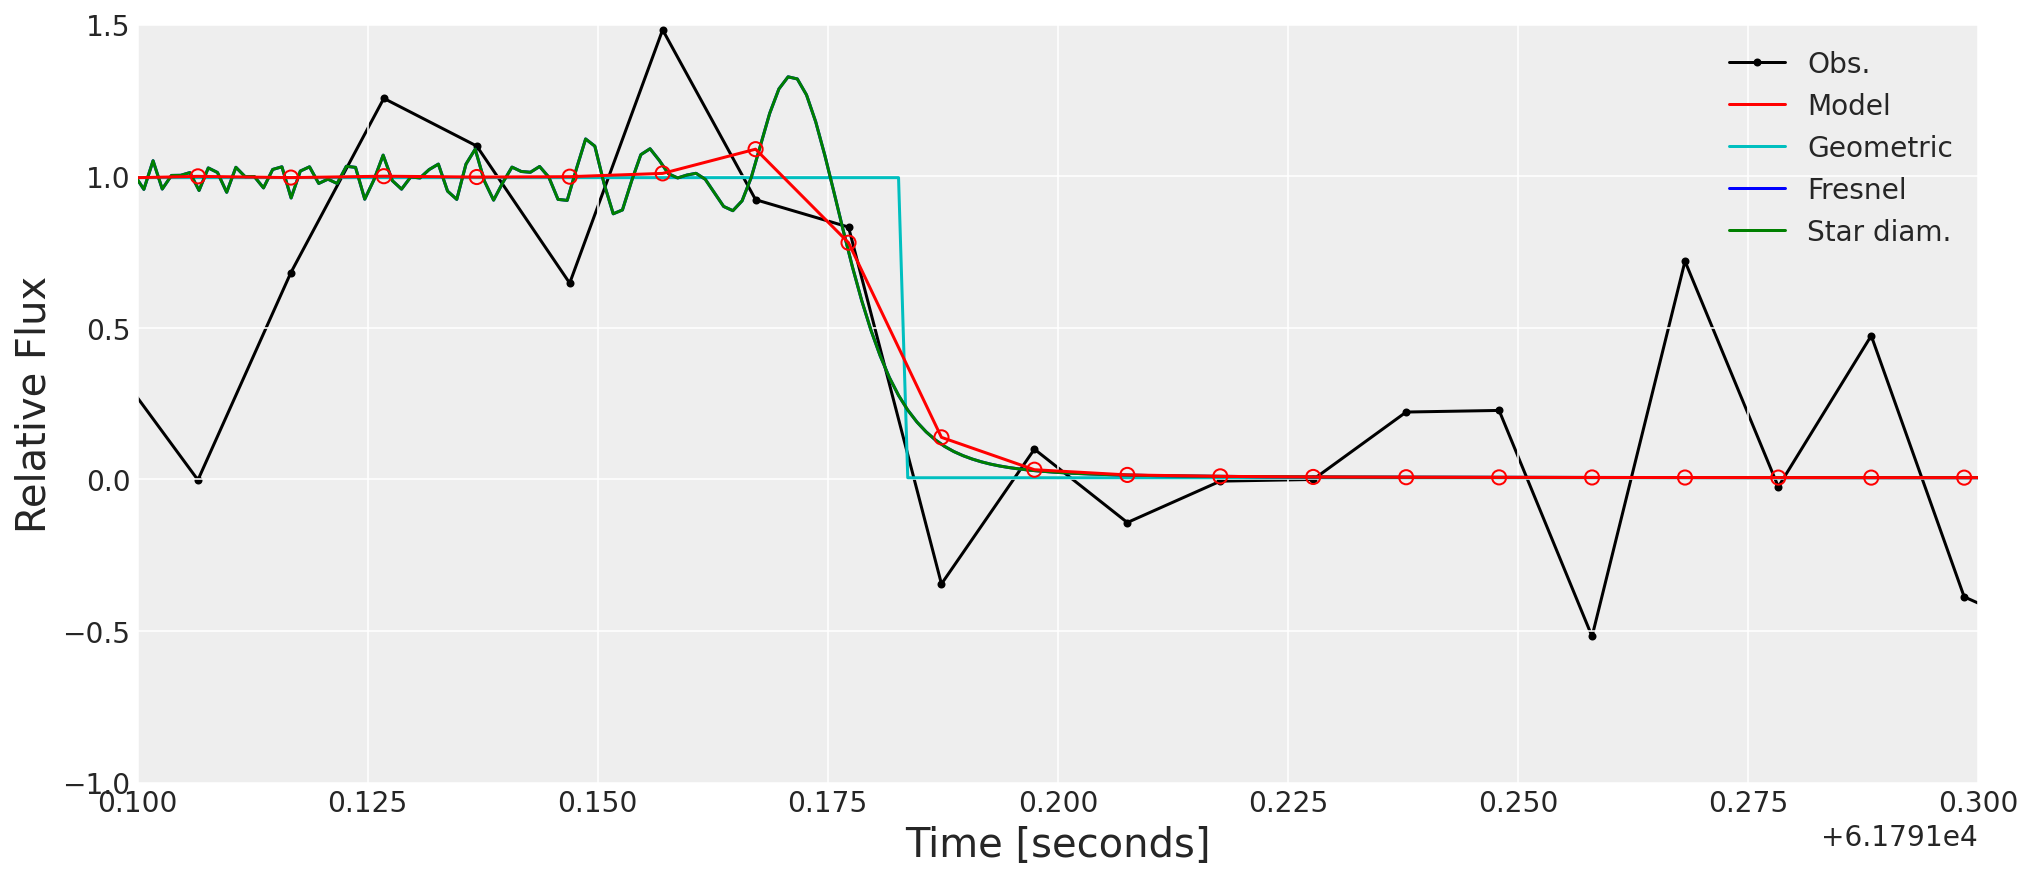

In [44]:
plt.figure(figsize=(14,6))
lc.plot_lc()
lc.plot_model()

plt.xlim(61791.1,61791.3)
plt.ylim(-1.0, 1.5)

In [45]:
lc.immersion

<Time object: scale='utc' format='iso' value=2022-07-29 17:09:51.183>